### Построение траекторий спуска различных алгоритмов

In [1177]:
from mods import *
from utils import *
plt.rcParams["figure.figsize"] = (20,10)

In [1178]:
def draw_lines_for(sub, x, y, batch_size=1, method=sgd_general, **config):
    if config == {}:
        config = {"lr0": 0.5, "d": 0.005, "epoch": 1000}
    x_mat = np.hstack((np.ones((x.shape[0], 1)), x))
    k = x_mat.shape[1]
    batch_choice = lambda batch_size: list(set(np.random.choice(np.arange(x.shape[0]), batch_size, replace=False)))
    f_batch_size = lambda batch_size: \
                       lambda *b, batch=batch_choice(batch_size): \
                           np.linalg.norm((y[batch] - x_mat[batch].dot(b)))
    bs = method(batch_size, f_batch_size, np.full(k, 1), **config)
    f = f_batch_size(x.shape[0])
    draw_level(sub, method.__name__, f, bs)


def draw_level(sub, method_name, f, points):
    plt.subplot(*sub)
    tx = np.linspace(-5, 25, 100)
    ty = np.linspace(-5, 15, 100)
    levels = sorted(list(set(([f(*p) for p in points]))))
    plt.contour(tx, ty, [[f(x, y) for x in tx] for y in ty], levels=levels)

    plt.plot(points[:, 0], points[:, 1], 'o-', color = '#ff0000',  markersize=2)
    plt.title(method_name)

In [1179]:
line = [np.array([[-2], [-1], [ 0], [ 1], [2]]), np.array([0, 10, 20, 30, 40])]

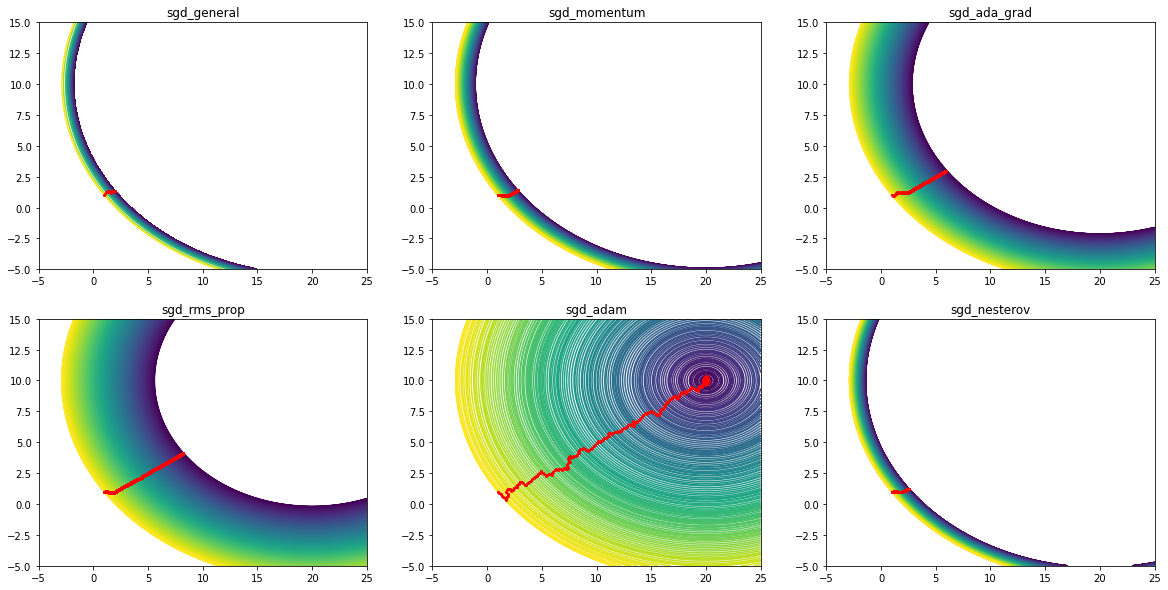

In [1180]:
gr_fmt = (2, 3)
draw_lines_for((*gr_fmt, 1), *line, lr0=0.1, d=0.1, epoch=1000)
draw_lines_for((*gr_fmt, 2), *line, method=sgd_momentum, lr0=0.001, epoch=1000, alpha=0.5)
draw_lines_for((*gr_fmt, 3), *line, method=sgd_ada_grad, lr0=0.1, epoch=1000)
draw_lines_for((*gr_fmt, 4), *line, method=sgd_rms_prop, lr0=0.01, epoch=1000, alpha=0.5)
draw_lines_for((*gr_fmt, 5), *line, method=sgd_adam, lr0=0.1, epoch=1000, alpha=0.35, beta=0.2)
draw_lines_for((*gr_fmt, 6), *line, method=sgd_nesterov, lr0=0.001, epoch=1000, alpha=0.4)
plt.show()